# This project focuses on identifying patterns and building a machine learning model to predict sleep disorders based on individuals' health and lifestyle factors. The model helps classify whether a person is likely to suffer from Sleep Apnea, Insomnia, or has No Disorder using clinical and demographic data.

# Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes = True,style='darkgrid')

In [2]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.shape

(374, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Observation
1. 5 columns are object datatype
2. sum null values in Sleep Disorder(target Variable)

In [5]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [6]:
# replace nan with no disorder
df['Sleep Disorder']=df['Sleep Disorder'].where(pd.notnull(df['Sleep Disorder']), 'No Disorder')

# pd.notnull(df['Sleep Disorder'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
# statistical info for numerical variables
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
# statistical info for object variale
df.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,No Disorder
freq,189,73,195,99,219


# EDA

In [10]:
col_name = df.columns
col_name

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [11]:
# unique values
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [12]:
# droping person ID
df.drop(columns='Person ID', inplace = True)

In [13]:

df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [14]:
df[['Upper BP', 'Lower BP']] = df['Blood Pressure'].str.split('/', expand = True).astype(int)
df.drop(columns = 'Blood Pressure', inplace = True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper BP,Lower BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


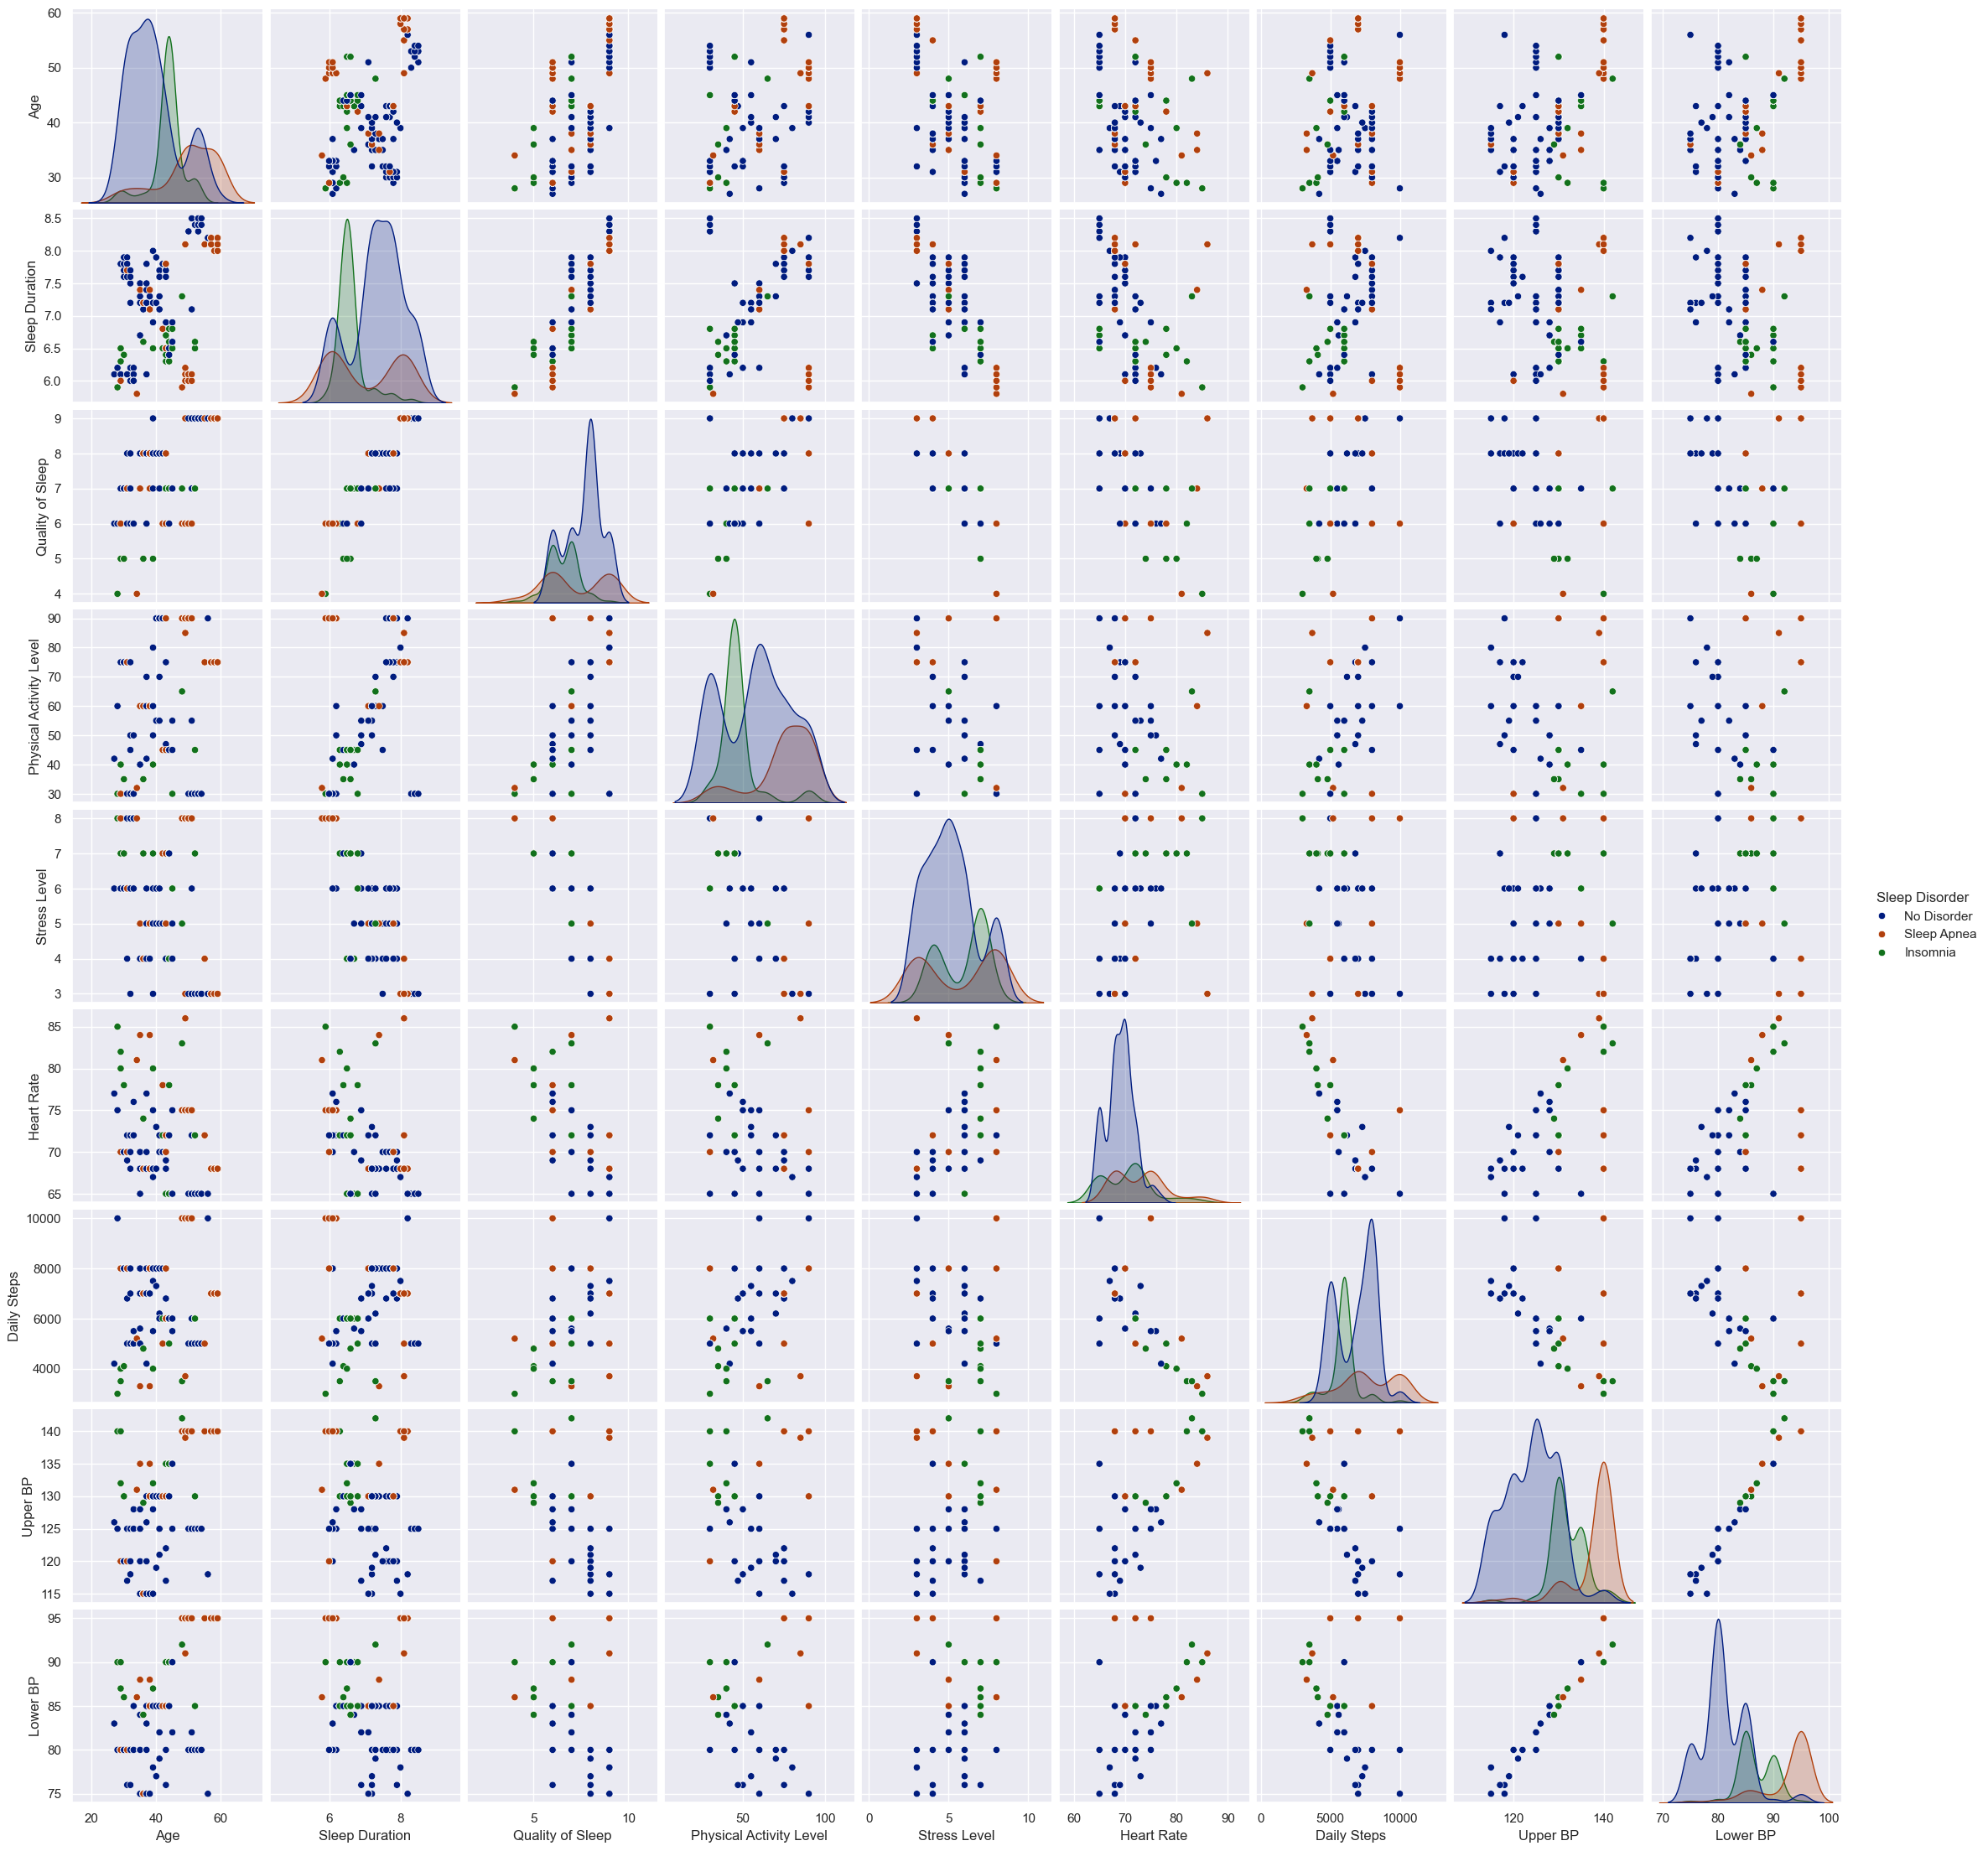

In [15]:
# PAIR Plot
sns.pairplot(data = df, hue='Sleep Disorder', palette = 'dark')

C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\791174027.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sleep Disorder', palette='Set2')


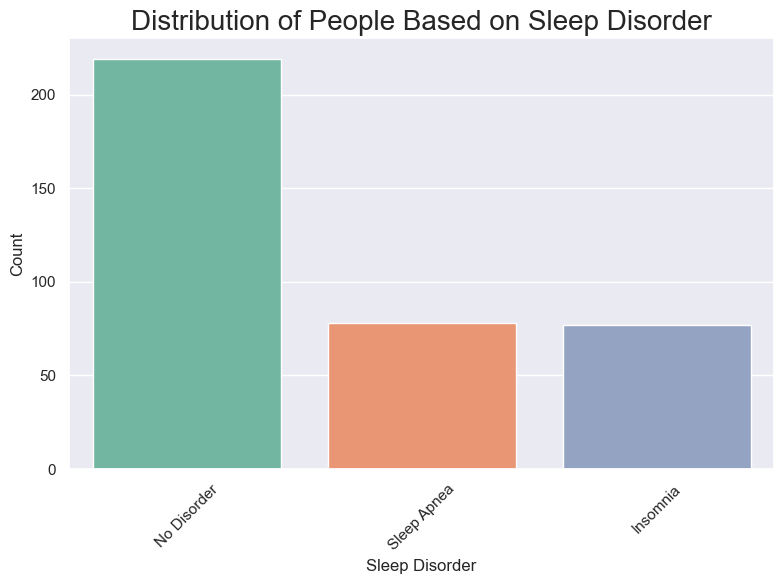

In [16]:
# Create count plot (bar plot for categorical data)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sleep Disorder', palette='Set2')

# Add titles and labels
plt.title('Distribution of People Based on Sleep Disorder', fontsize=20)
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()
plt.show()

In [17]:
# gender
df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
No Disorder     Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

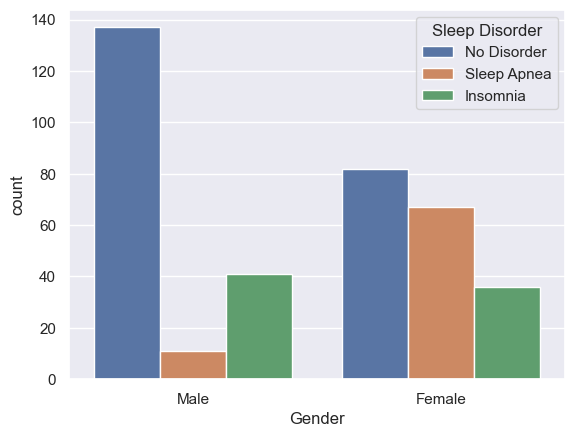

In [18]:
sns.countplot(x = 'Gender', hue='Sleep Disorder', data = df)


Observation
1. Normal Males are more than women
2. Sleep APnea is more in females than in males
3. Insomania is more in males than in females

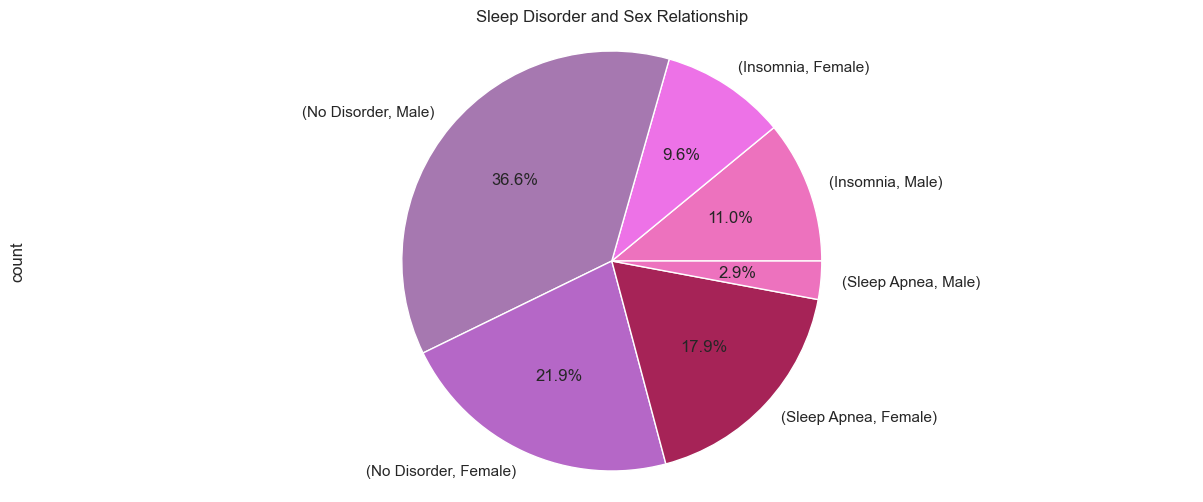

In [19]:
# gender
df.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct = '%1.1f%%',
                                                               figsize = (15,6),
                                                               colors = ['#ed72be', '#ed72e7',
                                                                         '#a678b0', '#b567c7','#a62357'])

plt.title('Sleep Disorder and Sex Relationship')
plt.axis('equal')
plt.show()

In [20]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Upper BP', 'Lower BP'],
      dtype='object')

In [21]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

In [22]:
num_cols, cat_cols

(Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
        'Stress Level', 'Heart Rate', 'Daily Steps', 'Upper BP', 'Lower BP'],
       dtype='object'),
 Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object'))

C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\2637583794.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\2637583794.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\2637583794.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)


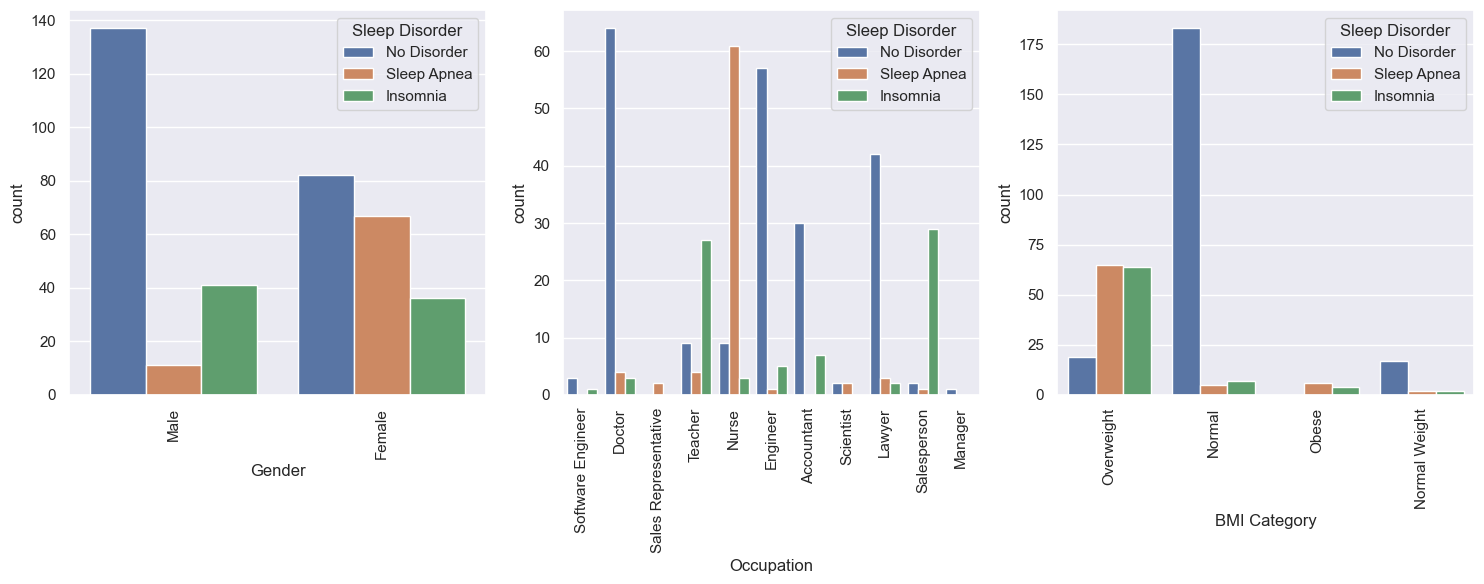

In [23]:
# plot categoriacal variables
fig,axs = plt.subplots(nrows=1, ncols = 3, figsize=(15,6))
axs = axs.flatten()

#barplot
for i, var in enumerate(cat_cols[:3]):
  sns.countplot(x = var, hue='Sleep Disorder', data = df, ax = axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)


fig.tight_layout()
plt.show()

Observation
1. Doctors have normal sleeps
2. Nurses are suffereing from Sleep Apnea.
3. Salesperson has highest Insomania
4. Overwieght ppl has higher chances of sleep disorder

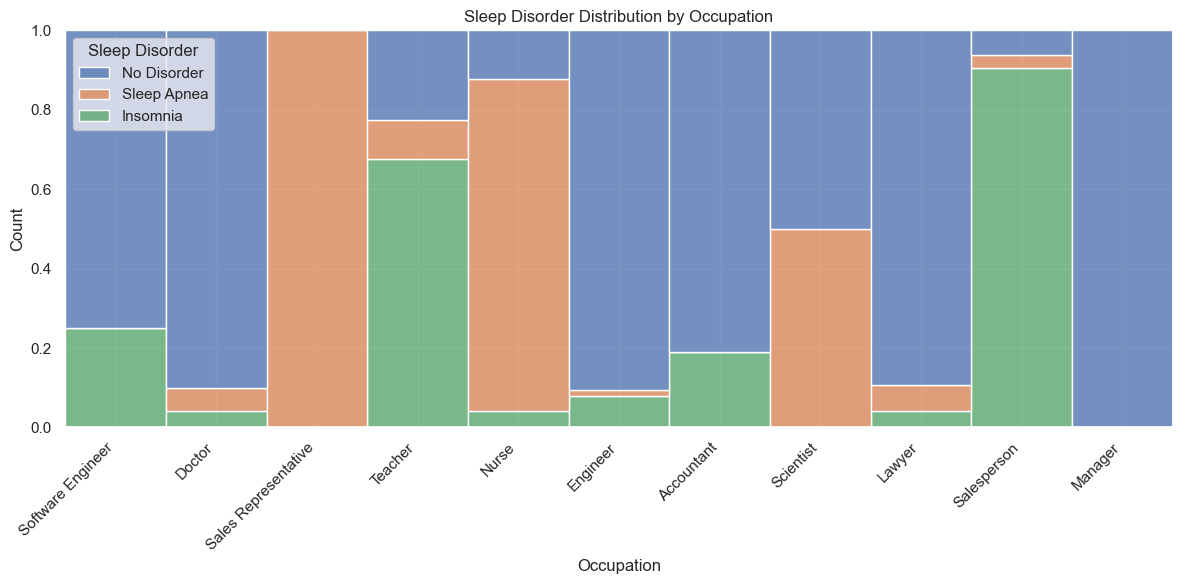

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(x = df['Occupation'], hue = 'Sleep Disorder', data = df, multiple='fill',kde = False, element = 'bars',fill=True)
plt.xticks(rotation=45, ha='right')  # Rotate and align tick labels
plt.title('Sleep Disorder Distribution by Occupation')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\1976029689.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\1976029689.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\1976029689.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)


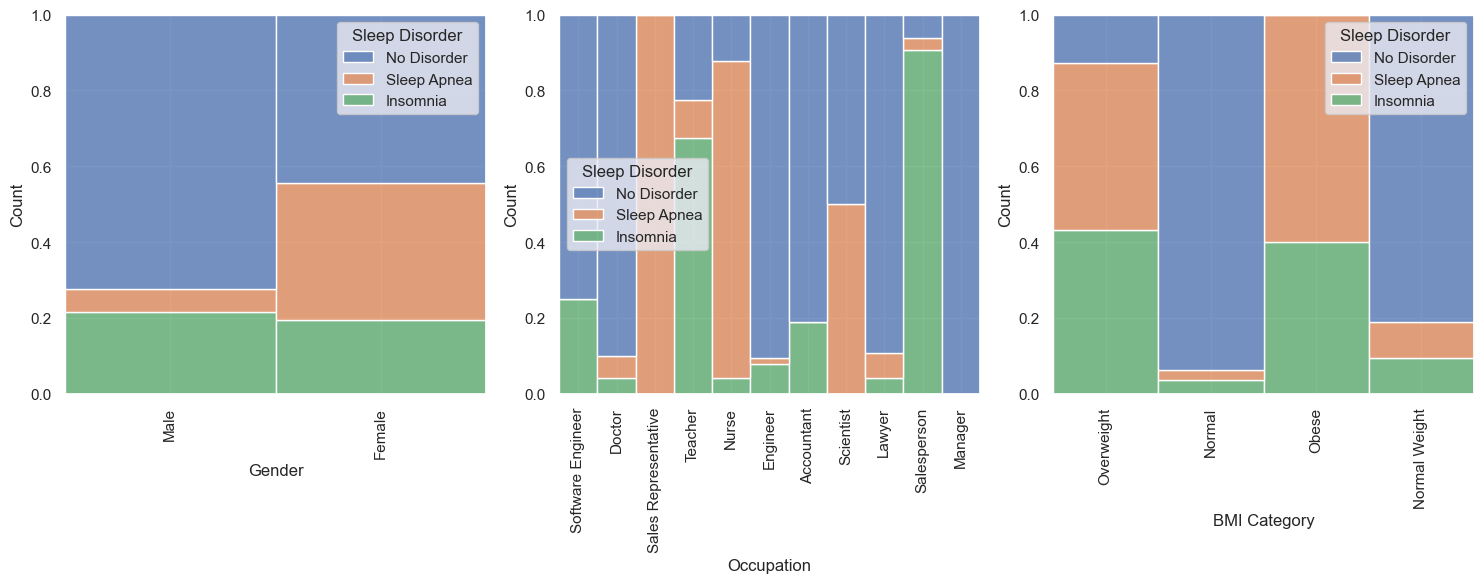

In [25]:
# plot categoriacal variables
fig,axs = plt.subplots(nrows=1, ncols = 3, figsize=(15,6))
axs = axs.flatten()

#barplot
for i, var in enumerate(cat_cols[:3]):
  sns.histplot(x = var, hue = 'Sleep Disorder', data = df,ax= axs[i], multiple='fill',
             kde = False, element = 'bars',fill=True)
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
  axs[i].set_xlabel(var)


fig.tight_layout()
plt.show()

In [26]:
num_cols

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Upper BP', 'Lower BP'],
      dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\2401688793.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


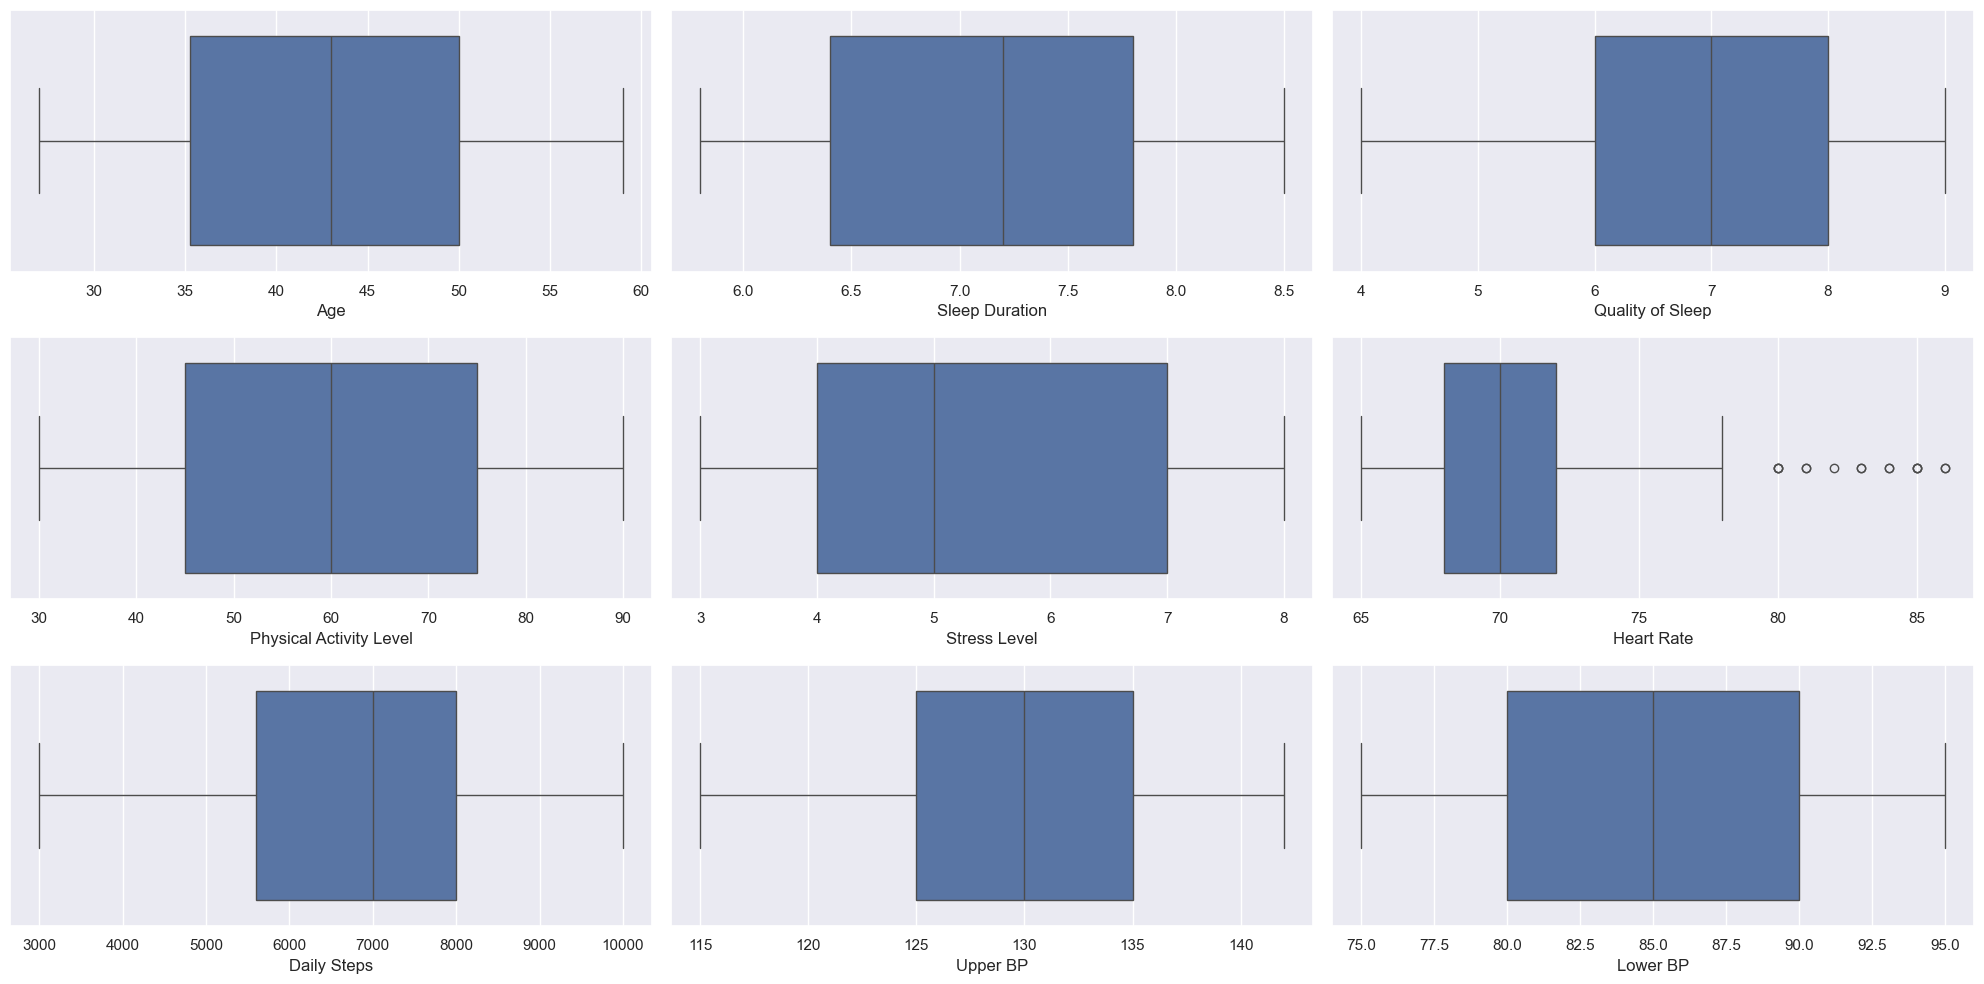

In [27]:
fig,axs = plt.subplots(nrows=3, ncols = 3, figsize=(20,10))
axs = axs.flatten()


for i, var in enumerate(num_cols):
  sns.boxplot(x = var, data = df, ax=axs[i])

fig.tight_layout()
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15988\2040630534.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


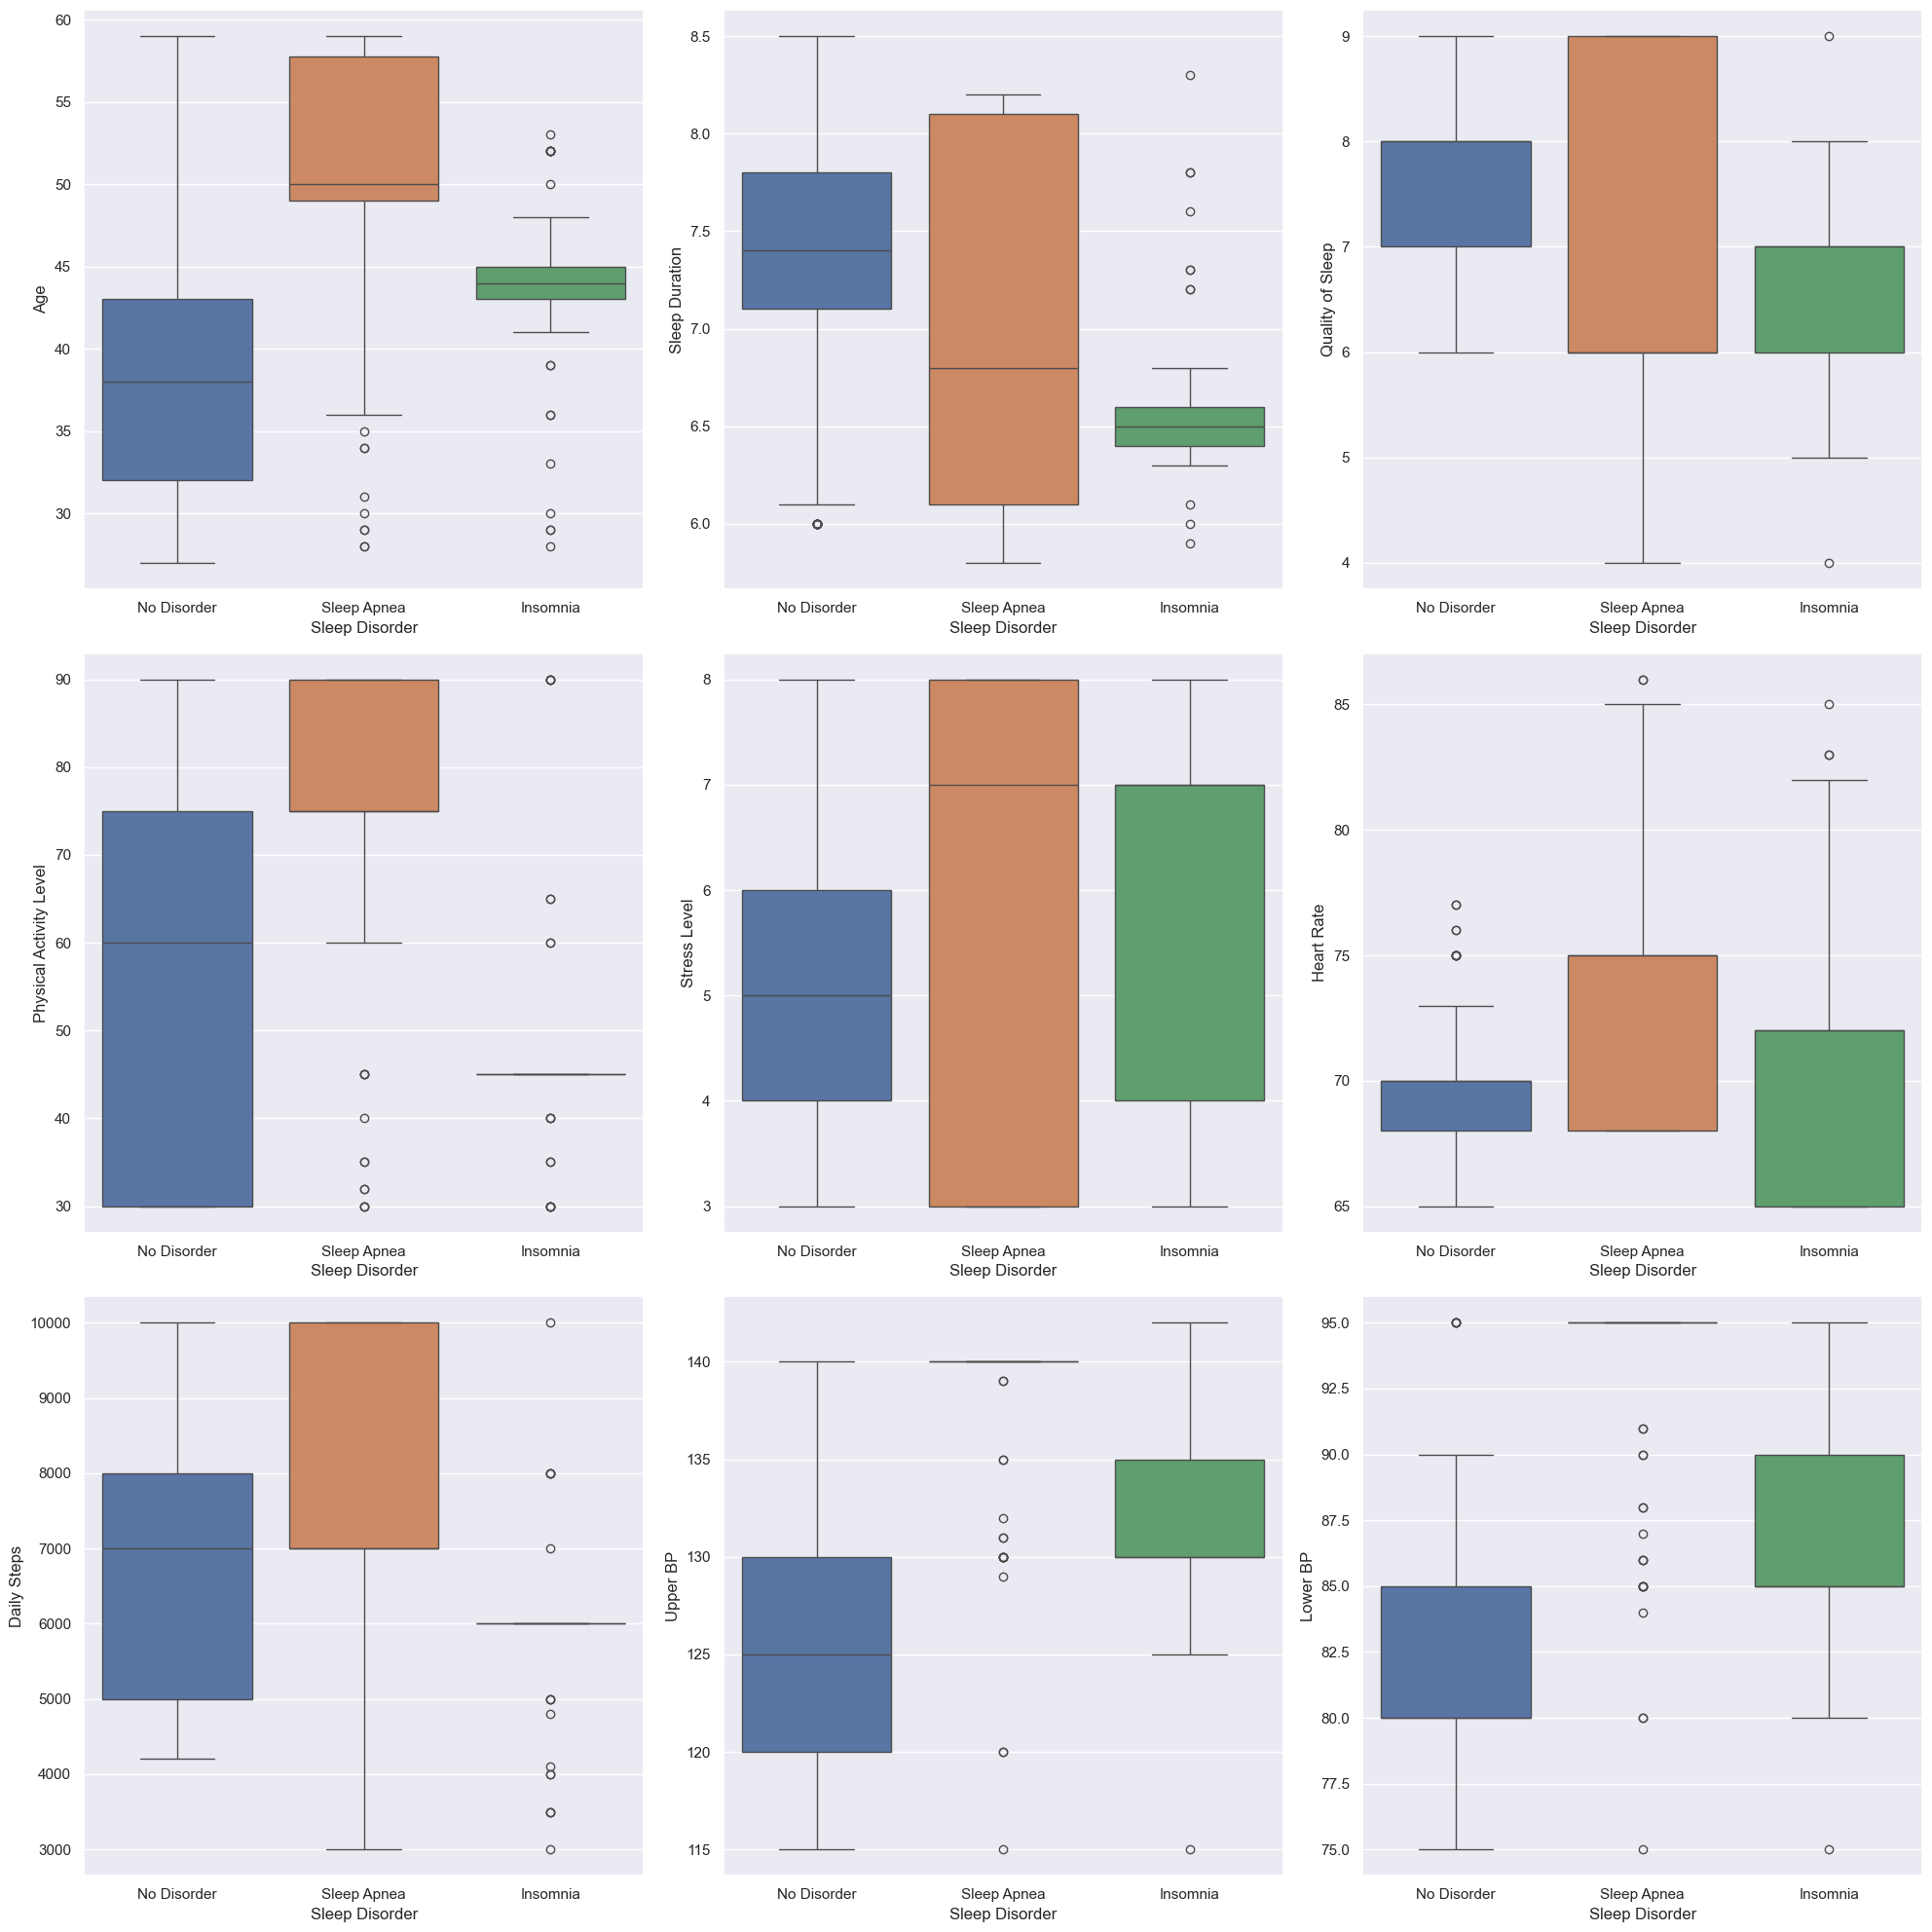

In [28]:
fig,axs = plt.subplots(nrows=3, ncols = 3, figsize=(20,20))
axs = axs.flatten()


for i, var in enumerate(num_cols):
  sns.boxplot(y = var, x= 'Sleep Disorder', hue='Sleep Disorder',data = df, ax=axs[i])

fig.tight_layout()
fig.show()

<Axes: xlabel='Stress Level', ylabel='count'>

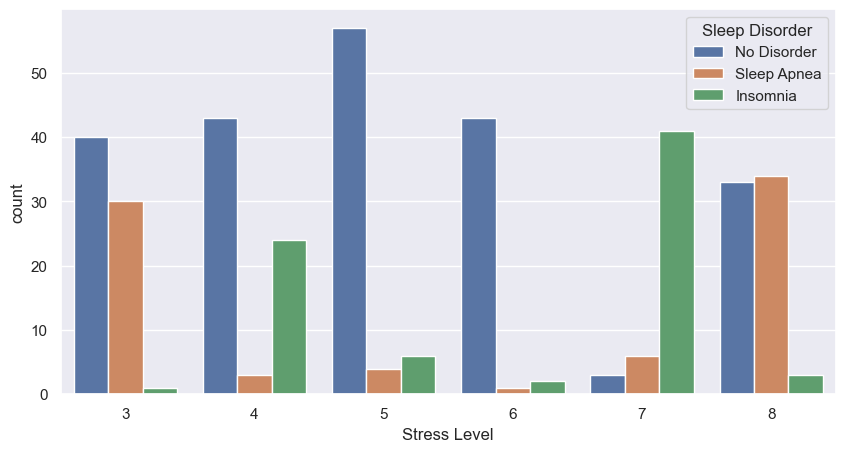

In [29]:

plt.figure(figsize=(10,5))

sns.countplot(x = 'Stress Level', hue='Sleep Disorder', data = df)

<Axes: xlabel='Quality of Sleep', ylabel='count'>

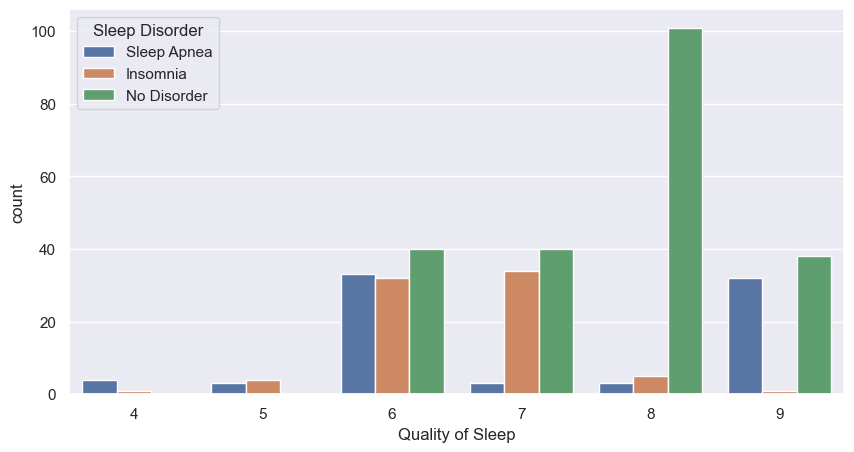

In [30]:

plt.figure(figsize=(10,5))

sns.countplot(x = 'Quality of Sleep', hue='Sleep Disorder', data = df)

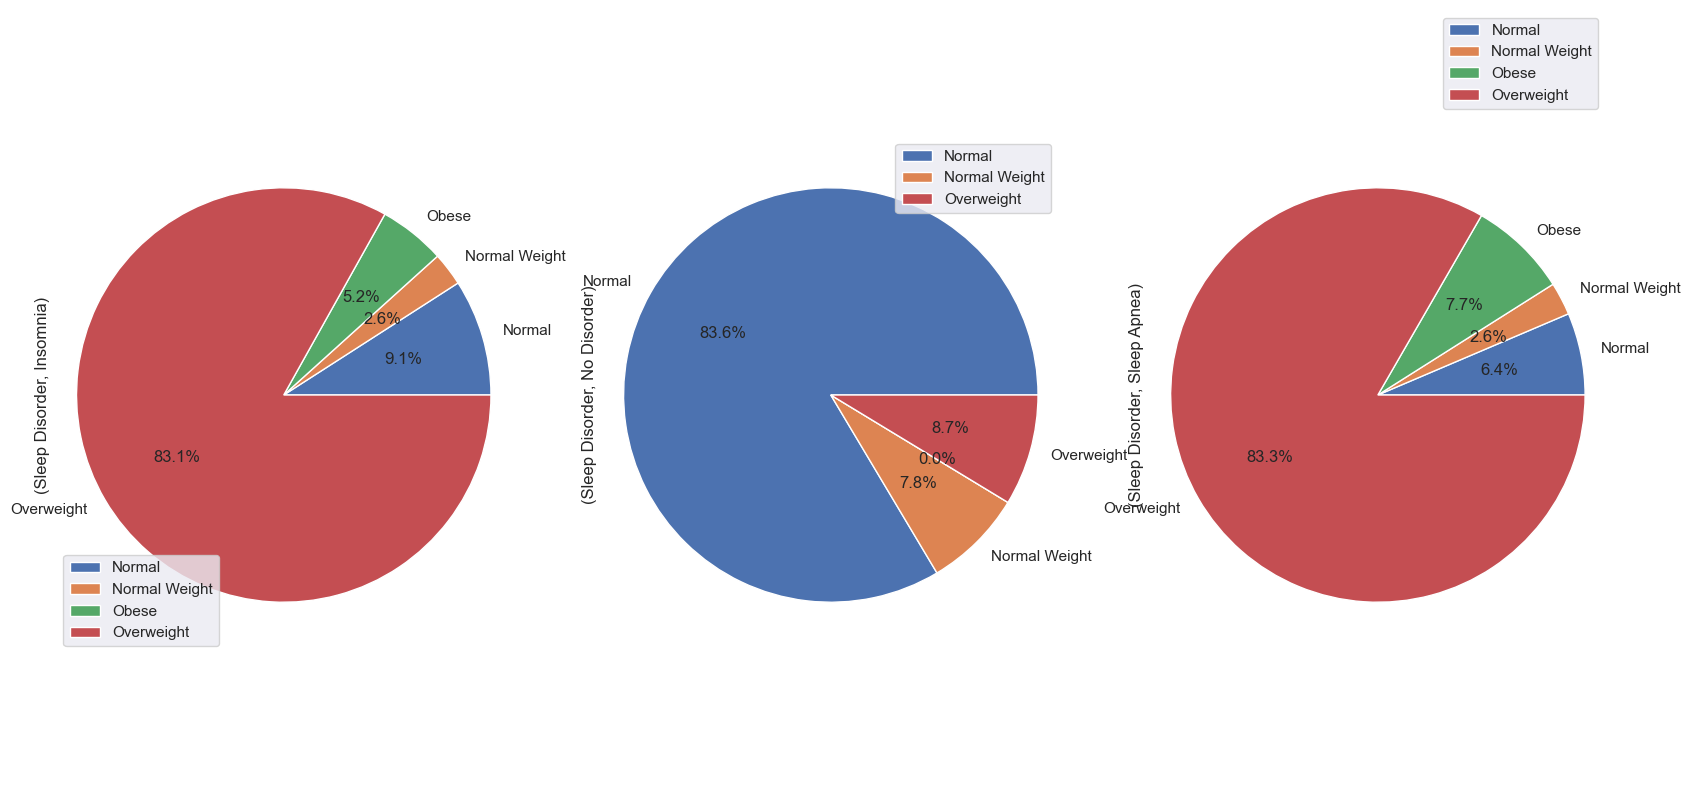

In [31]:
df.pivot_table(index ='BMI Category', columns='Sleep Disorder', aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct='%1.1f%%',subplots=True, figsize=(20,10))
plt.axis('equal')
plt.show()


# Data Preprocessing

In [32]:
# check missing values
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Upper BP                   0
Lower BP                   0
dtype: int64

# For cat cols

In [33]:

for col in cat_cols:
  print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Sleep Disorder: ['No Disorder' 'Sleep Apnea' 'Insomnia']


# Label Encoding of cat cols

In [34]:
from sklearn.preprocessing import LabelEncoder


for col in cat_cols:
  le = LabelEncoder()

  #fit
  le.fit(df[col].unique())

  #encoder
  df[col] = le.transform(df[col])

  print(f"{col}: {df[col].unique()}")
     

Gender: [1 0]
Occupation: [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category: [3 0 2 1]
Sleep Disorder: [1 2 0]


# Correlation

In [35]:
corr = df.corr()

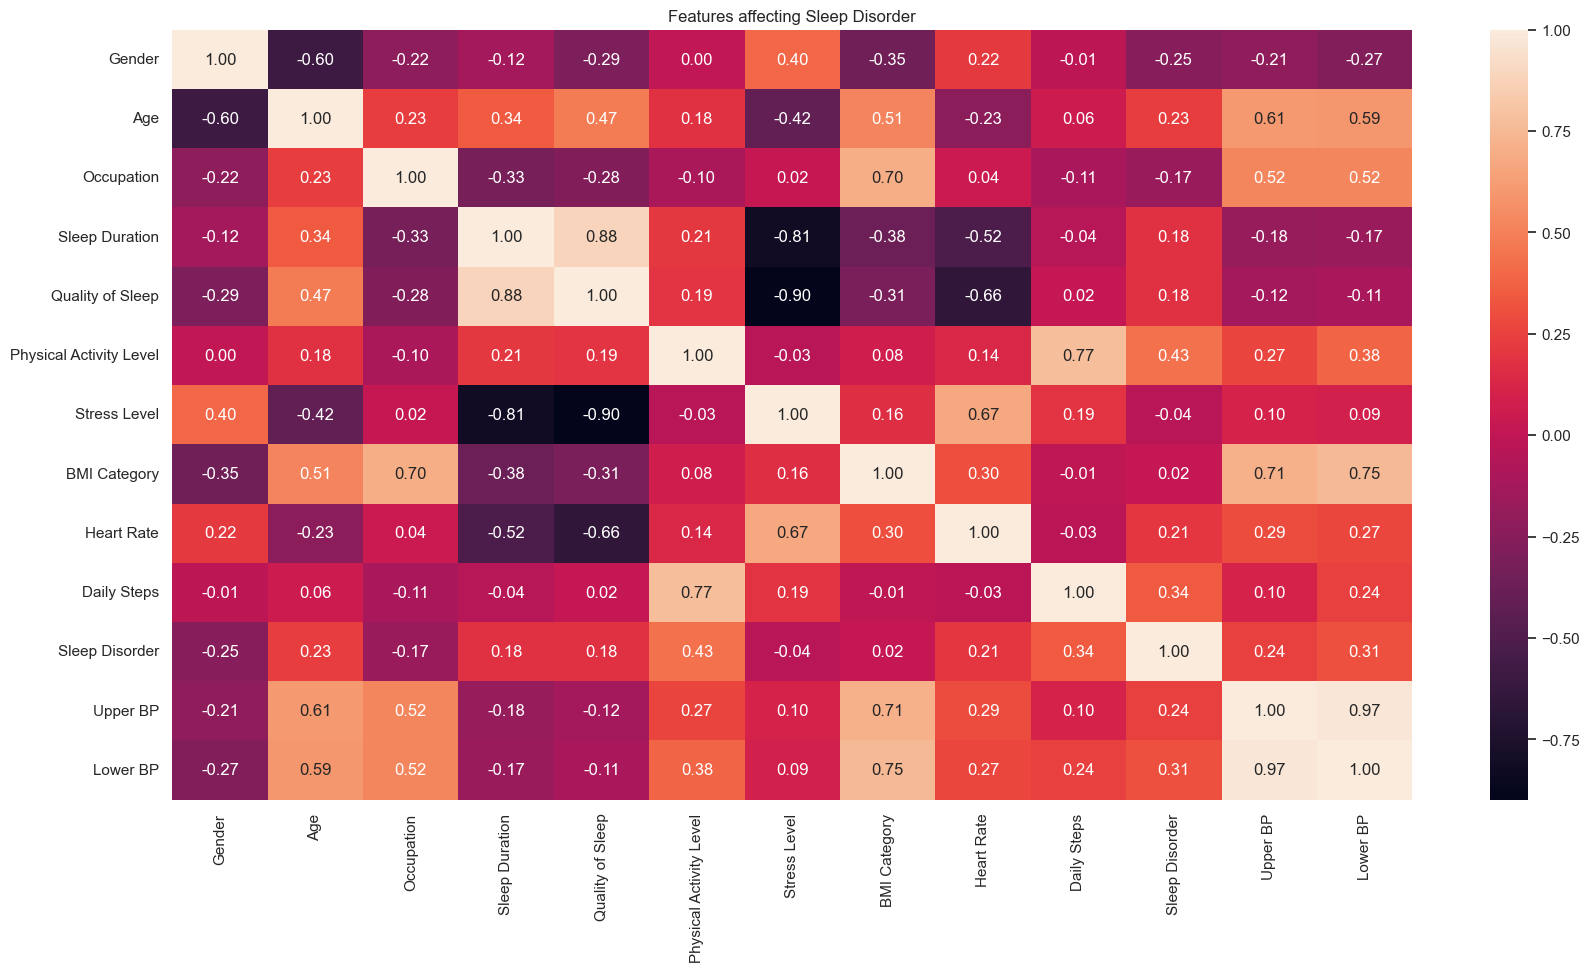

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, fmt='.2f', annot = True)
plt.title('Features affecting Sleep Disorder')
plt.show()

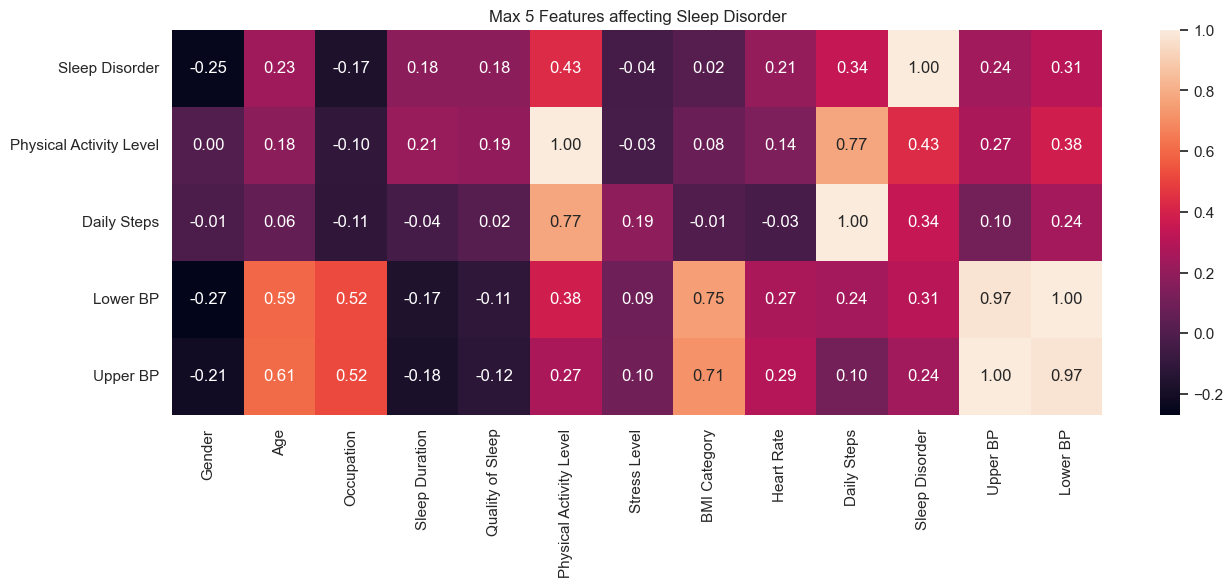

In [37]:
max_5_corr = corr.nlargest(5, 'Sleep Disorder')
plt.figure(figsize=(15,5))
sns.heatmap(max_5_corr, fmt='.2f', annot = True)
plt.title('Max 5 Features affecting Sleep Disorder')
plt.show()

# Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('Sleep Disorder', axis =1 )
y = df['Sleep Disorder']

#Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [39]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (261, 12)
Shape of y_train: (261,)
Shape of X_test: (113, 12)
Shape of y_test: (113,)


# Model Training

1. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
lr.score(X_train, y_train)

0.7279693486590039

In [42]:
lr.score(X_test, y_test)

0.672566371681416

In [43]:

lr_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

accuracy_score(y_test, lr_pred)

0.672566371681416

In [45]:
def model_accuracy(model, model_name):
    """ To print the accuracy score"""
    y_pred = model.predict(X_test)
    print(f"---------{model_name}---------")
    print(f'Accuracy : {round(accuracy_score(y_test, y_pred)*100,2)}%')
    print(f"F1 Score: {round(f1_score(y_test, y_pred, average = 'micro'), 2)}")
    print(f"Precision Score: {round(precision_score(y_test, y_pred, average = 'micro'), 2)}")
    print(f"Recall Score: {round(recall_score(y_test, y_pred, average='micro'), 2)}")
    print(f"Jaccard Score: {round(jaccard_score(y_test, y_pred, average='micro'), 2)}")

In [46]:
model_accuracy(lr, 'Logistic Regression')

---------Logistic Regression---------
Accuracy : 67.26%
F1 Score: 0.67
Precision Score: 0.67
Recall Score: 0.67
Jaccard Score: 0.51


2. Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
model_accuracy(dtree, "DecisionTree before GRID SEARCH")

---------DecisionTree before GRID SEARCH---------
Accuracy : 86.73%
F1 Score: 0.87
Precision Score: 0.87
Recall Score: 0.87
Jaccard Score: 0.77


In [48]:
# paramgrid
param_grid = {
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}

In [49]:
#cross validation
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

In [50]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

In [51]:
dtree = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2
)

dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)
model_accuracy(dtree, "Decision Tree After GRID SEARCH")

---------Decision Tree After GRID SEARCH---------
Accuracy : 90.27%
F1 Score: 0.9
Precision Score: 0.9
Recall Score: 0.9
Jaccard Score: 0.82


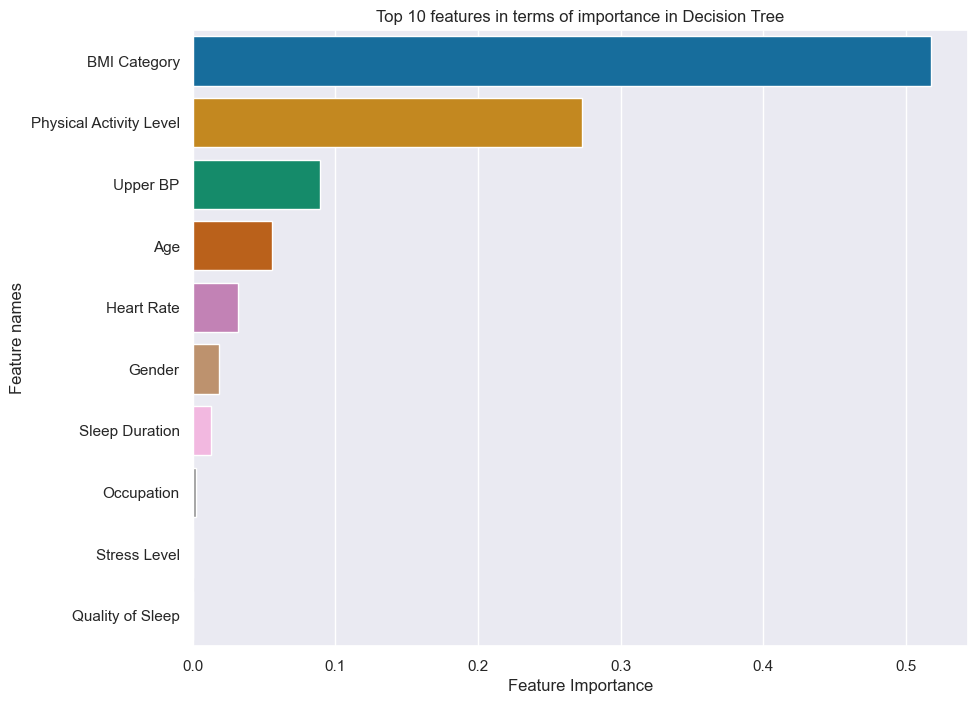

In [52]:
# top 10 important features
imp_df = pd.DataFrame({
    'Feature name' : X_train.columns,
    'importance': dtree.feature_importances_
}).sort_values(by='importance', ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(data = imp_df, x = 'importance', y='Feature name', hue='Feature name', palette='colorblind', legend=False)

plt.xlabel('Feature Importance')
plt.ylabel('Feature names')
plt.title('Top 10 features in terms of importance in Decision Tree')
plt.show()

Text(47.25, 0.5, 'Actual Values')

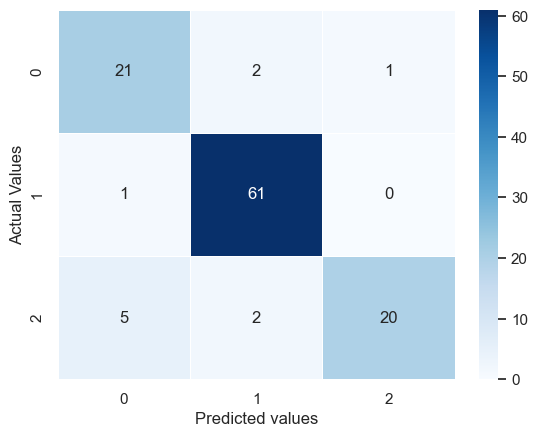

In [53]:
#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(data = cm, linewidth=.5, annot=True, cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

3. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train,y_train)
model_accuracy(rforest, "RandomFOrest before CV")

---------RandomFOrest before CV---------
Accuracy : 89.38%
F1 Score: 0.89
Precision Score: 0.89
Recall Score: 0.89
Jaccard Score: 0.81


In [55]:

# GridSearch CV
param_grid={
    'n_estimators':[100,200],
    'max_depth':[None, 5, 10],
    'max_features':['sqrt','log2', None],
    'random_state':[0,42]
}

grid_searchrf = GridSearchCV(rforest, param_grid, cv=5)
grid_searchrf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200], 'random_state': [0, 42]})

In [56]:
grid_searchrf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 0}

In [57]:
rforest2 = RandomForestClassifier(
    max_depth=5,
    max_features = 'sqrt',
    n_estimators = 100,
    random_state=0
)
rforest2.fit(X_train,y_train)
model_accuracy(rforest2, "RandomFOrest after CV")

---------RandomFOrest after CV---------
Accuracy : 89.38%
F1 Score: 0.89
Precision Score: 0.89
Recall Score: 0.89
Jaccard Score: 0.81


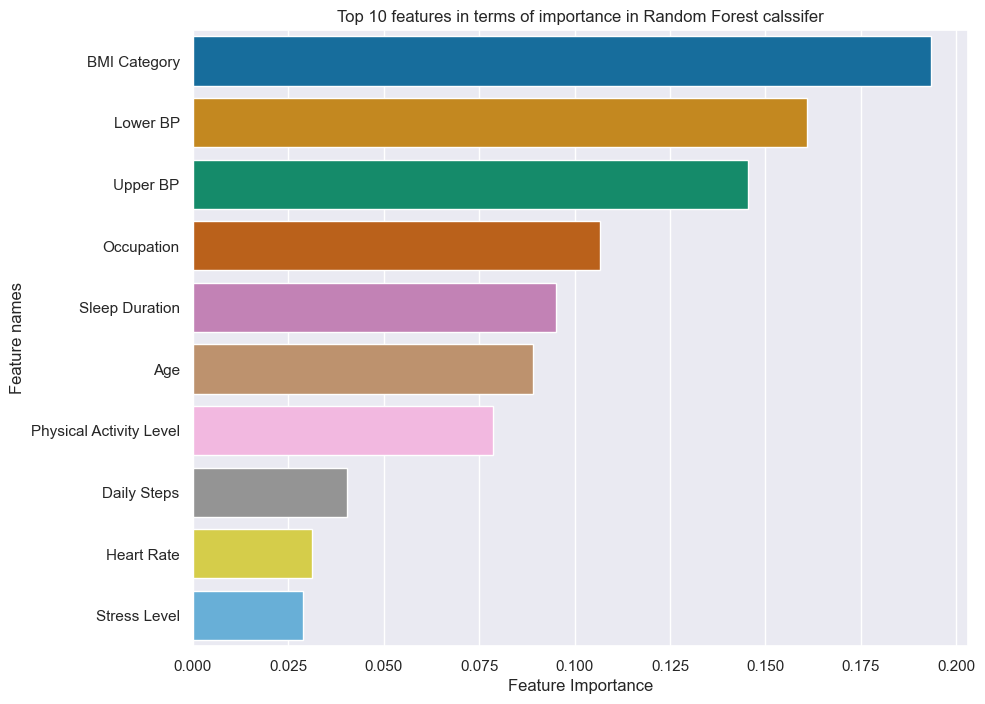

In [58]:
# top 10 important features
imp_df = pd.DataFrame({
    'Feature name' : X_train.columns,
    'importance': rforest2.feature_importances_
}).sort_values(by='importance', ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(data = imp_df, x = 'importance', y='Feature name', hue='Feature name', palette='colorblind', legend=False)

plt.xlabel('Feature Importance')
plt.ylabel('Feature names')
plt.title('Top 10 features in terms of importance in Random Forest calssifer')
plt.show()

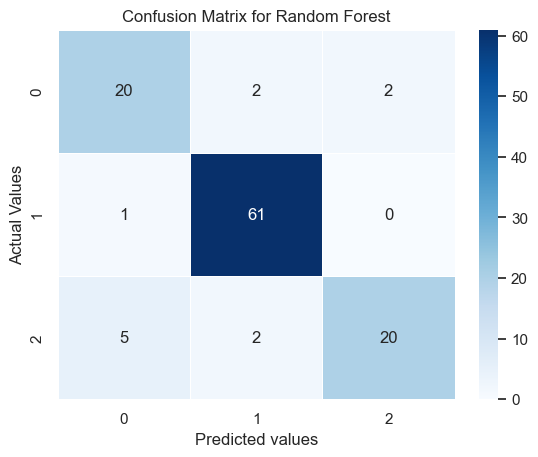

In [59]:
#confusion matrix

from sklearn.metrics import confusion_matrix
y_pred_rforest = rforest2.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rforest)
sns.heatmap(data = cm, linewidth=.5, annot=True, cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [60]:
def makeConfusionMatrix(model, modelName):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(data = cm, linewidth=.5, annot=True, cmap="Blues")
  plt.xlabel('Predicted values')
  plt.ylabel('Actual Values')
  plt.title(f"Confusion Matrix for {modelName}")
  plt.show()
     

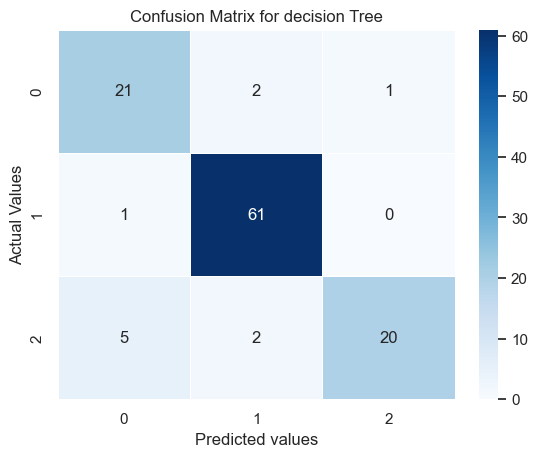

In [61]:
makeConfusionMatrix(dtree, "decision Tree")

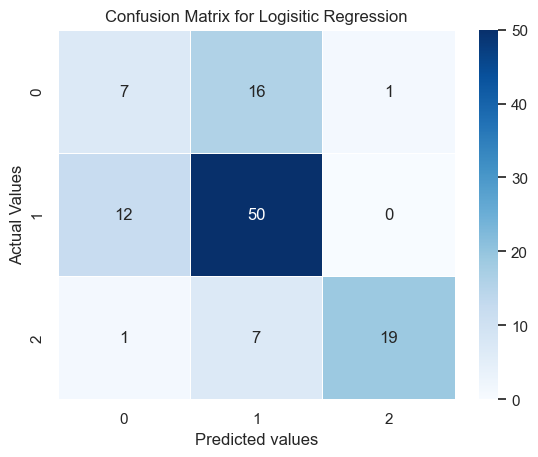

In [62]:
makeConfusionMatrix(lr, 'Logisitic Regression')

In [63]:
model_accuracy(dtree, 'Decision Tree')
model_accuracy(rforest2, "Random Forest")
model_accuracy(lr, "Logisitic Regression")

---------Decision Tree---------
Accuracy : 90.27%
F1 Score: 0.9
Precision Score: 0.9
Recall Score: 0.9
Jaccard Score: 0.82
---------Random Forest---------
Accuracy : 89.38%
F1 Score: 0.89
Precision Score: 0.89
Recall Score: 0.89
Jaccard Score: 0.81
---------Logisitic Regression---------
Accuracy : 67.26%
F1 Score: 0.67
Precision Score: 0.67
Recall Score: 0.67
Jaccard Score: 0.51


Conclusion
1. Decision Tree performs good when compared to Random Forest and Logistic Regression
2. Accuracy : 90.27%
   F1 Score: 0.9
   Precision Score: 0.9
   Recall Score: 0.9
   Jaccard Score: 0.82